### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot  as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Gathering

In [2]:
# Load the "bank.csv" datasets into pandas dataframes
df_bank = pd.read_csv('bank.csv', sep=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Data Analysis

In [4]:
# defining the function to get counts 
def get_counts(data):
    plt.figure(figsize = (15,5))
    plt.ylabel("Counts",fontsize = 10)
    return  data.value_counts().plot(kind = "bar",cmap='rainbow')
    plt.show()

Text(0.5, 0, 'Age')

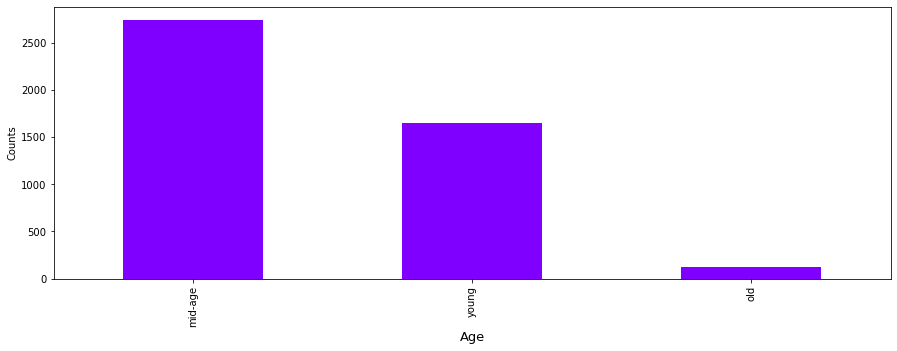

In [5]:
# getting information about counts of the population in each age category.
age_count = df_bank["age"]
age_count = pd.cut(age_count,bins = [18,35,60,90],labels = ["young","mid-age","old"])
get_counts(age_count)
plt.xlabel("Age",fontsize = 13)

Text(0.5, 0, 'Job')

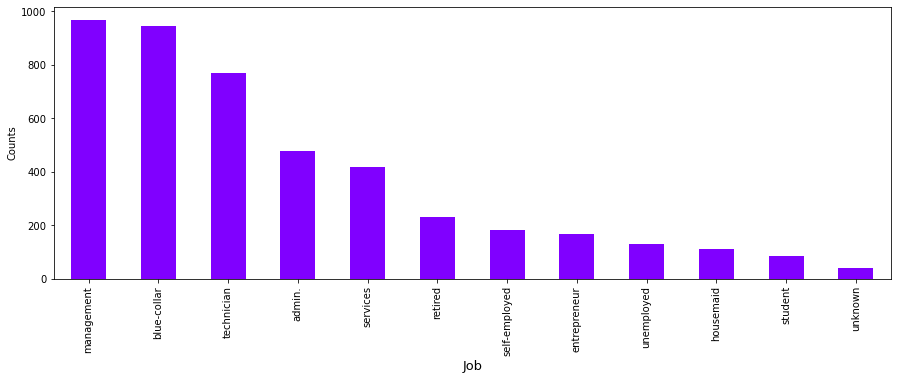

In [6]:
# getting information about counts of the population in each job category.
get_counts(df_bank["job"])
plt.xlabel("Job",fontsize = 13)

Text(0.5, 0, 'Merital Status')

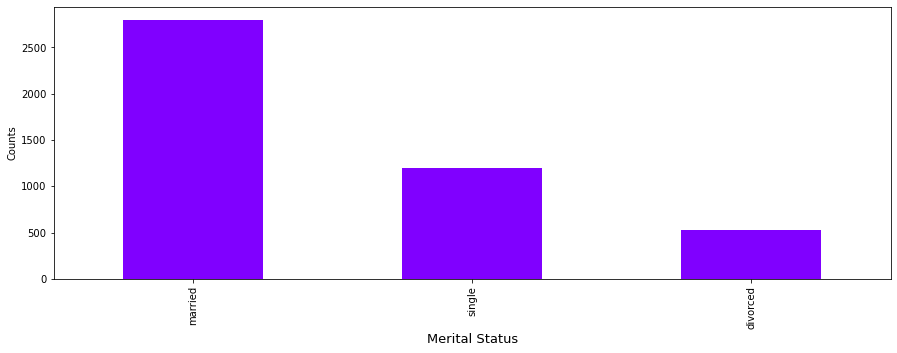

In [7]:
# getting information about counts of the population in each marital category.
get_counts(df_bank["marital"])
plt.xlabel("Merital Status",fontsize = 13)

Text(0.5, 0, 'Education')

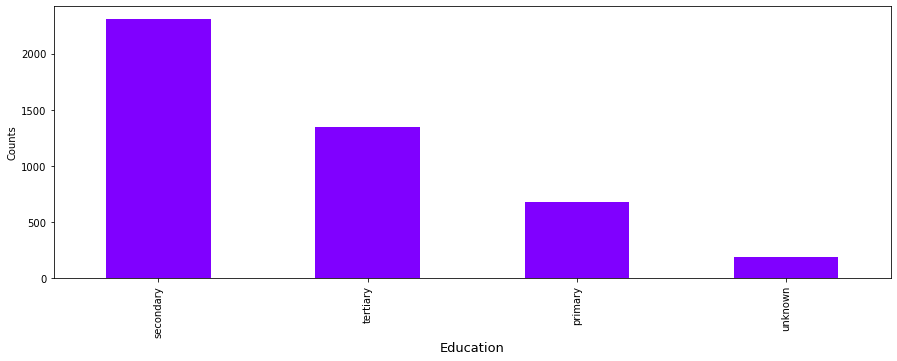

In [8]:
# getting information about counts of the population in each education category.
get_counts(df_bank["education"])
plt.xlabel("Education",fontsize = 13)

Text(0.5, 0, 'Credit in default')

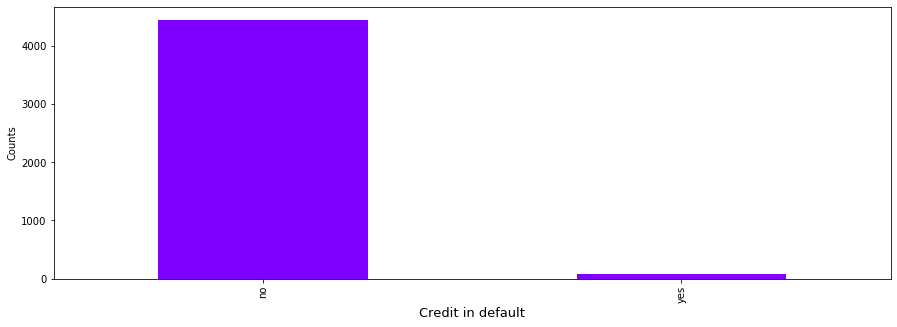

In [9]:
# getting information about counts of the population in each credit category.
get_counts(df_bank["default"])
plt.xlabel("Credit in default",fontsize = 13)

Text(0.5, 0, 'Housing Loan')

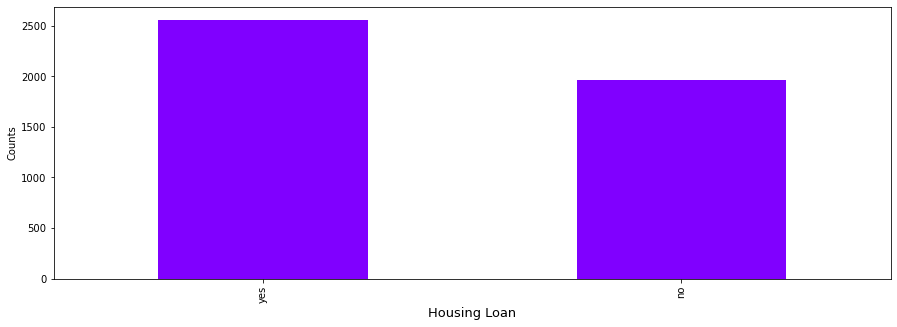

In [10]:
# getting information about counts of the population in each housing loan category.
get_counts(df_bank["housing"])
plt.xlabel("Housing Loan",fontsize = 13)

Text(0.5, 0, 'Personal Loan')

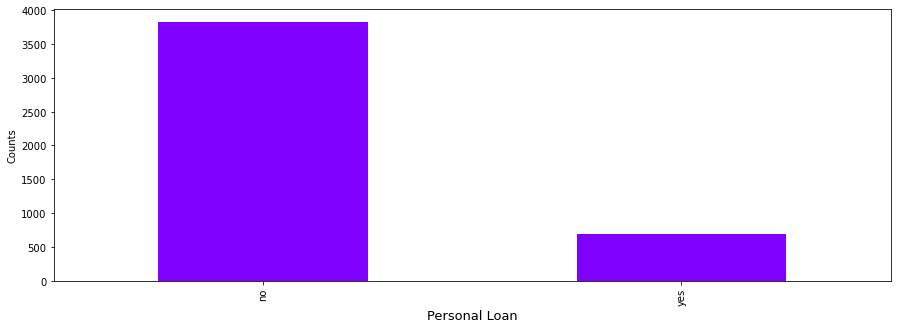

In [11]:
# getting information about counts of the population in each personal loan category.
get_counts(df_bank["loan"])
plt.xlabel("Personal Loan",fontsize = 13)

Text(0.5, 0, 'contact communication type')

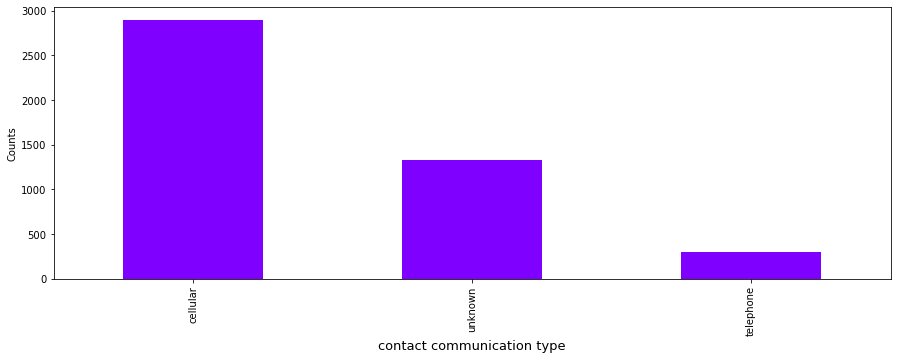

In [12]:
# getting information about counts of the population in each contact communication category.
get_counts(df_bank["contact"])
plt.xlabel("contact communication type",fontsize = 13)

Text(0.5, 0, 'last contact month of year')

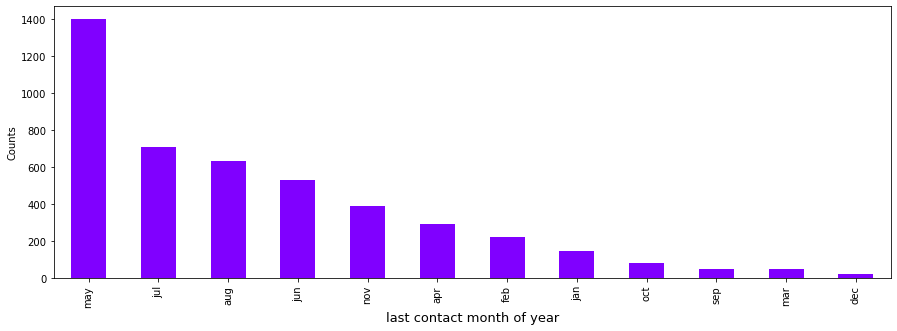

In [13]:
# getting information about counts of the population in each contact last month of year category.
get_counts(df_bank["month"])
plt.xlabel("last contact month of year",fontsize = 13)

Text(0.5, 0, 'Outcome of the previous marketing campaign')

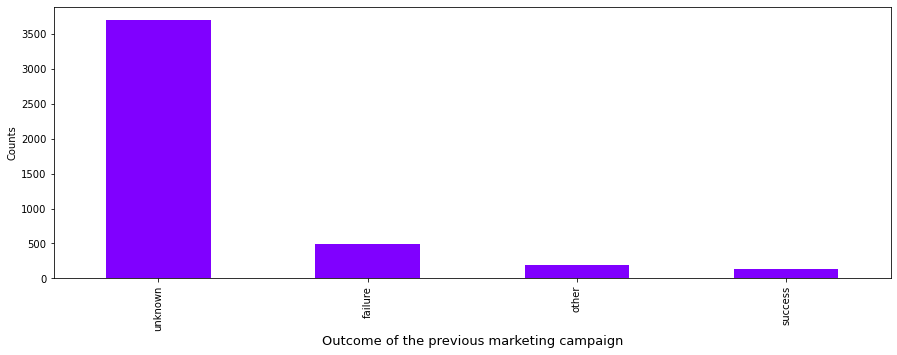

In [14]:
# getting information about counts of the population in each Outcome category.
get_counts(df_bank["poutcome"])
plt.xlabel("Outcome of the previous marketing campaign",fontsize = 13)

In [15]:
# defining a function to get distribution and outliers
def get_distribution(data):
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    sns.distplot(data, hist = False,ax = axes[0],color="r")
    sns.boxplot(data,ax = axes[1],color="g")
    return plt.show()

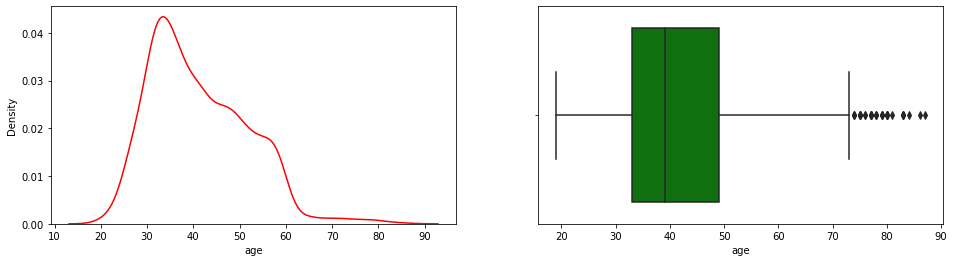

In [16]:
# getting information regarding distribution and outliers of age feature.
get_distribution(df_bank["age"])

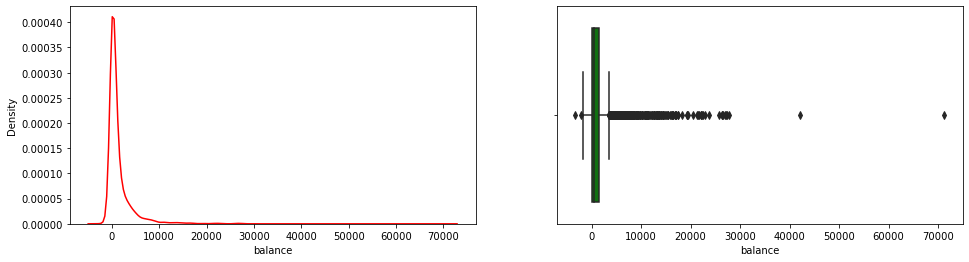

In [17]:
# getting information regarding distribution and outliers of balance feature.
get_distribution(df_bank["balance"])

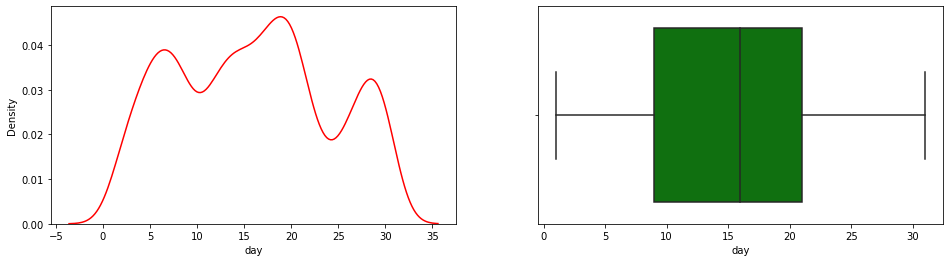

In [18]:
# getting information regarding distribution and outliers of day feature.
get_distribution(df_bank["day"])

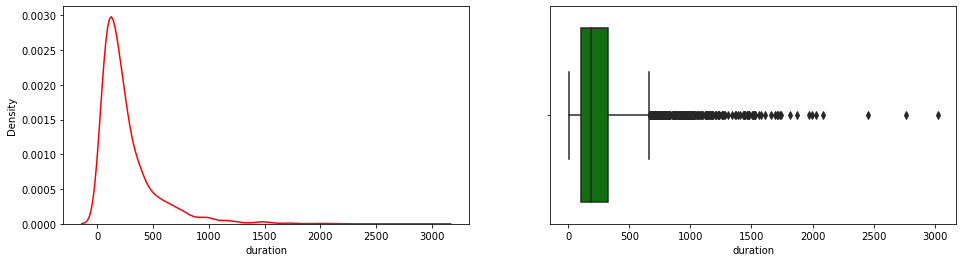

In [19]:
# getting information regarding distribution and outliers of duration feature.
get_distribution(df_bank["duration"])

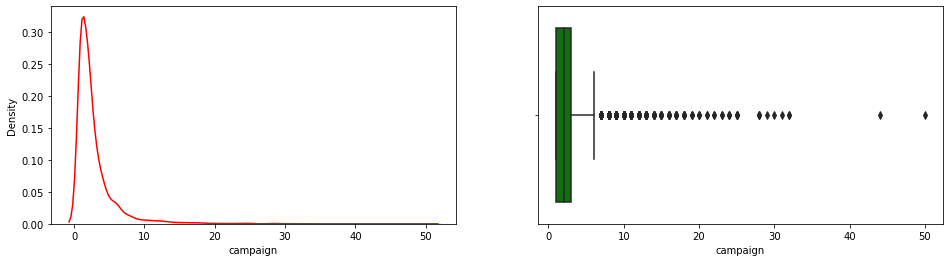

In [20]:
# getting information regarding distribution and outliers of campaign feature.
get_distribution(df_bank["campaign"])

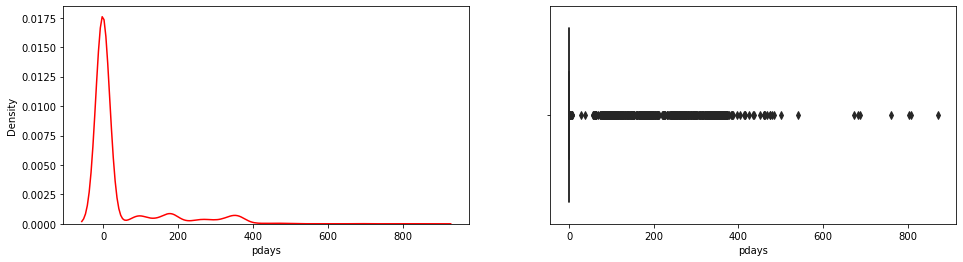

In [21]:
# getting information regarding distribution and outliers of pdays feature.
get_distribution(df_bank["pdays"])

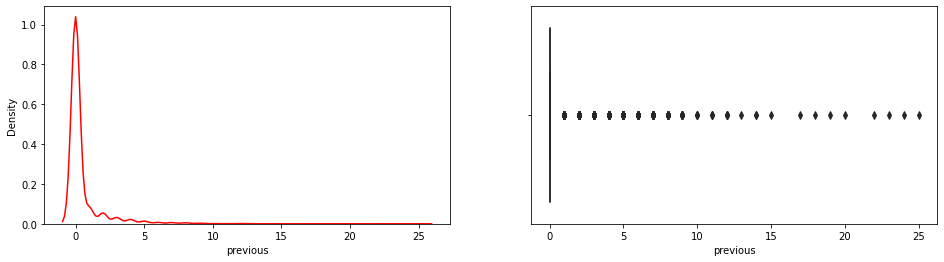

In [22]:
# getting information regarding distribution and outliers of previous feature.
get_distribution(df_bank["previous"])

In [23]:
df1 = df_bank.pivot_table(values = "age", columns = "y",index = "job",aggfunc="mean")
df1

y,no,yes
job,,
admin.,39.471429,41.206897
blue-collar,40.273660,38.666667
entrepreneur,41.993464,42.200000
housemaid,47.571429,45.714286
management,40.763723,39.114504
retired,60.215909,67.259259
self-employed,40.950920,45.550000
services,38.641161,37.868421
student,27.584615,24.210526


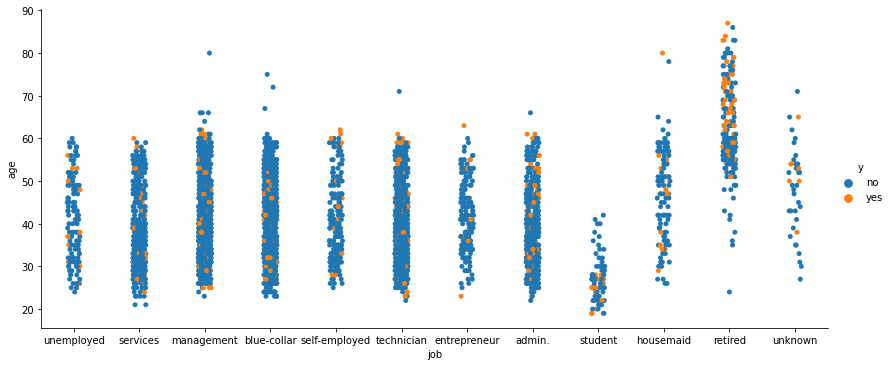

In [24]:
# here is the distribution of ages in each category of job in both of targeted categories.
sns.catplot(data = df_bank, x = "job", y = "age", 
            hue = "y", jitter = 0.1, aspect = 2.3,height = 5)

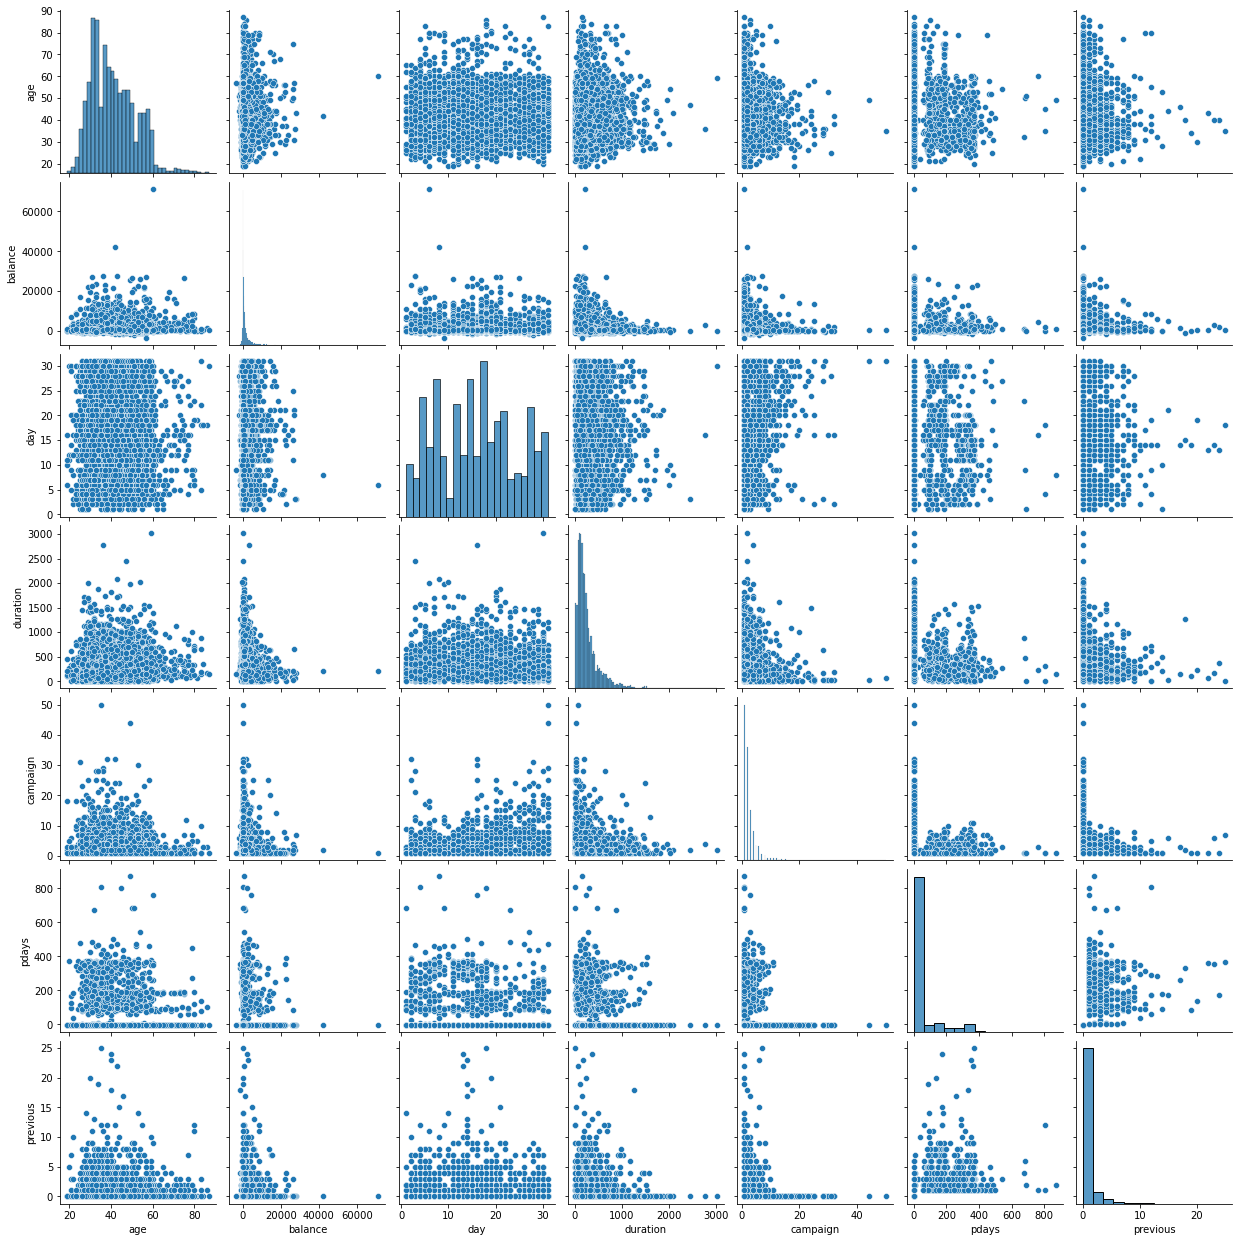

In [25]:
# Getting distribution of data points (checking featuers are related to each other or not)
sns.pairplot(data = df_bank.drop("y",axis = 1))

In [26]:
df = df_bank.copy()

In [27]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [28]:
df_bank.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [29]:
df= df_bank.copy()

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [31]:
#Getting dummies for required columns
df = pd.get_dummies(df,prefix=['job','marital', 'education','housing','loan', 'contact', 'poutcome'],columns=['job','marital', 'education','housing','loan', 'contact', 'poutcome'])

In [32]:
df.columns

Index(['age', 'default', 'balance', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [33]:
df[df.previous>12].y.value_counts()

no     10
yes     2
Name: y, dtype: int64

In [34]:
df[df.loan_yes==1].y.value_counts()

no     648
yes     43
Name: y, dtype: int64

In [35]:
df['y'].replace(to_replace=["no","yes"],value=[0,1],inplace = True)


In [36]:
df['default'].replace(to_replace=["no","yes"],value=[0,1],inplace= True)
df['default']

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    1
4518    0
4519    0
4520    0
Name: default, Length: 4521, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4521 non-null   int64 
 1   default              4521 non-null   int64 
 2   balance              4521 non-null   int64 
 3   day                  4521 non-null   int64 
 4   month                4521 non-null   object
 5   duration             4521 non-null   int64 
 6   campaign             4521 non-null   int64 
 7   pdays                4521 non-null   int64 
 8   previous             4521 non-null   int64 
 9   y                    4521 non-null   int64 
 10  job_admin.           4521 non-null   uint8 
 11  job_blue-collar      4521 non-null   uint8 
 12  job_entrepreneur     4521 non-null   uint8 
 13  job_housemaid        4521 non-null   uint8 
 14  job_management       4521 non-null   uint8 
 15  job_retired          4521 non-null   uint8 
 16  job_se

## Model Selection
### --Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
features=['age', 'default', 'balance',  'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown']
target=["y"]

In [42]:
x=df[features]
y=df[target]
print(x.shape)
print(y.shape)


(4521, 37)
(4521, 1)


In [43]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(xtrain)
x_test=scaler.fit_transform(xtest)

In [45]:
model.fit(x_train,ytrain)

LogisticRegression()

In [46]:
pred=model.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,ytest)

0.9082872928176795

### --Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2, random_state=0)

In [49]:
pred_rf=clf.predict(x_test)
accuracy_score(pred,ytest)

0.9082872928176795